In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.metrics import mean_squared_error

In [3]:
test1_df = pd.read_csv('SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('SE_rents2018_test2.csv', index_col=0)
test3_df = pd.read_csv('SE_rents2018_test3.csv', index_col=0)
train_df = pd.read_csv('SE_rents2018_train.csv', index_col=0)
# bedrooms, bathrooms, size_sqft, and year_built use for linear model.
# borough, neighborhood, has_doorman, and size_sqft for non-linear model. 

In [34]:
url = 'https://api.census.gov/data/2017/acs/acs5?'
params = {'get' : 'NAME,B19013_001E,B25058_001E',
          'for' : 'zip code tabulation area:*',}

r = requests.get(url, params=params)
print(r.url)

https://api.census.gov/data/2017/acs/acs5?get=NAME%2CB19013_001E%2CB25058_001E&for=zip+code+tabulation+area%3A%2A


In [35]:
income_df = pd.DataFrame(r.json()[1:], columns=r.json()[0])
income_df.head(10)

,NAME,B19013_001E,B25058_001E,zip code tabulation area
0,ZCTA5 00601,11757,291,00601
1,ZCTA5 00602,16190,304,00602
2,ZCTA5 00603,16645,306,00603
3,ZCTA5 00606,13387,185,00606
4,ZCTA5 00610,18741,322,00610
5,ZCTA5 00612,17744,310,00612
6,ZCTA5 00616,14918,327,00616
7,ZCTA5 00617,17157,375,00617
8,ZCTA5 00622,16727,392,00622
9,ZCTA5 00623,16401,352,00623


In [44]:

income_df = (income_df
             .rename(
                 columns={
                          'B19013_001E' : 'Median Household Income',
                          'B25058_001E' : 'Median Rent',
                          'zip code tabulation area' : 'addr_zip',
                         }
             )
            )
income_df.head(3)
#income_df.loc['10956']
#income_df.dtypes

,NAME,Median Household Income,Median Rent,addr_zip
0,ZCTA5 00601,11757,291,00601
1,ZCTA5 00602,16190,304,00602
2,ZCTA5 00603,16645,306,00603


In [62]:
income_df['addr_zip'] = income_df['addr_zip'].astype(int)
income_df['Median Rent'] = income_df['addr_zip'].astype(int)
income_df['Median Household Income'] = income_df['Median Household Income'].astype(int)

In [56]:
test1_df.head(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,
7499437,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,40.719799,...,0,0,2700,1,"By Owner, No Fees!\n\nNewly renovated building...",Little Italy,Manhattan,1B,1.0,B
7477903,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,40.693118,...,0,0,1650,1,this is a beautiful spacious renovated full s...,Bushwick,Brooklyn,C4,4.0,C
7481023,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,40.683399,...,1,0,2900,0,"Garden level, pet-friendly, 2 bedroom, 1 bath ...",Columbia St Waterfront District,Brooklyn,GARDEN,NaN,NaN
7479547,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,40.799900,...,0,0,4750,1,Ivy Park is a boutique condominium with a uniq...,Upper West Side,Manhattan,2C,2.0,C
7518814,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,40.795350,...,0,0,1800,0,Located across from the New East River Plaza w...,East Harlem,Manhattan,9,NaN,NaN


In [49]:
#TODO I got stuck here
test_merge_df = test1_df.merge(right=income_df,how='left', on='addr_zip')

# Here is the link to the data set. https://catalog.data.gov/dataset/demographic-statistics-by-zip-code-acfc9
demographic_by_zipcode_df = pd.read_csv('Demographic_Statistics_By_Zip_Code.csv', index_col=0)
print(demographic_by_zipcode_df.columns)
test_merge_df = pd.merge(test_merge_df,demographic_by_zipcode_df, left_on = test_merge_df.addr_zip , right_index=True, how = 'left')
test_merge_df.head(5)

Index(['COUNT PARTICIPANTS', 'COUNT FEMALE', 'PERCENT FEMALE', 'COUNT MALE',
       'PERCENT MALE', 'COUNT GENDER UNKNOWN', 'PERCENT GENDER UNKNOWN',
       'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,40.719799,...,8.0,100.0,1.0,0.13,7.0,0.88,0.0,0.0,8.0,100.0
1,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,40.693118,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,40.683399,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,40.799900,...,27.0,100.0,8.0,0.30,19.0,0.70,0.0,0.0,27.0,100.0
4,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,40.795350,...,20.0,100.0,8.0,0.40,12.0,0.60,0.0,0.0,20.0,100.0


In [50]:
def get_heatmap(df):
    corrmat = df.corr()
    top_corr = corrmat.index
    plt.figure(figsize=(len(df.columns),len(df.columns)))
    df_g = sns.heatmap(df[top_corr].corr(), annot=True, cmap="RdYlGn")
    return df_g

['COUNT PARTICIPANTS' 'COUNT FEMALE' 'PERCENT FEMALE' 'COUNT MALE'
 'PERCENT MALE' 'COUNT GENDER UNKNOWN' 'PERCENT GENDER UNKNOWN'
 'COUNT GENDER TOTAL' 'PERCENT GENDER TOTAL' 'COUNT PACIFIC ISLANDER'
 'PERCENT PACIFIC ISLANDER' 'COUNT HISPANIC LATINO'
 'PERCENT HISPANIC LATINO' 'COUNT AMERICAN INDIAN'
 'PERCENT AMERICAN INDIAN' 'COUNT ASIAN NON HISPANIC'
 'PERCENT ASIAN NON HISPANIC' 'COUNT WHITE NON HISPANIC'
 'PERCENT WHITE NON HISPANIC' 'COUNT BLACK NON HISPANIC'
 'PERCENT BLACK NON HISPANIC' 'COUNT OTHER ETHNICITY'
 'PERCENT OTHER ETHNICITY' 'COUNT ETHNICITY UNKNOWN'
 'PERCENT ETHNICITY UNKNOWN' 'COUNT ETHNICITY TOTAL'
 'PERCENT ETHNICITY TOTAL' 'COUNT PERMANENT RESIDENT ALIEN'
 'PERCENT PERMANENT RESIDENT ALIEN' 'COUNT US CITIZEN'
 'PERCENT US CITIZEN' 'COUNT OTHER CITIZEN STATUS'
 'PERCENT OTHER CITIZEN STATUS' 'COUNT CITIZEN STATUS UNKNOWN'
 'PERCENT CITIZEN STATUS UNKNOWN' 'COUNT CITIZEN STATUS TOTAL'
 'PERCENT CITIZEN STATUS TOTAL' 'COUNT RECEIVES PUBLIC ASSISTANCE'
 'PERCENT

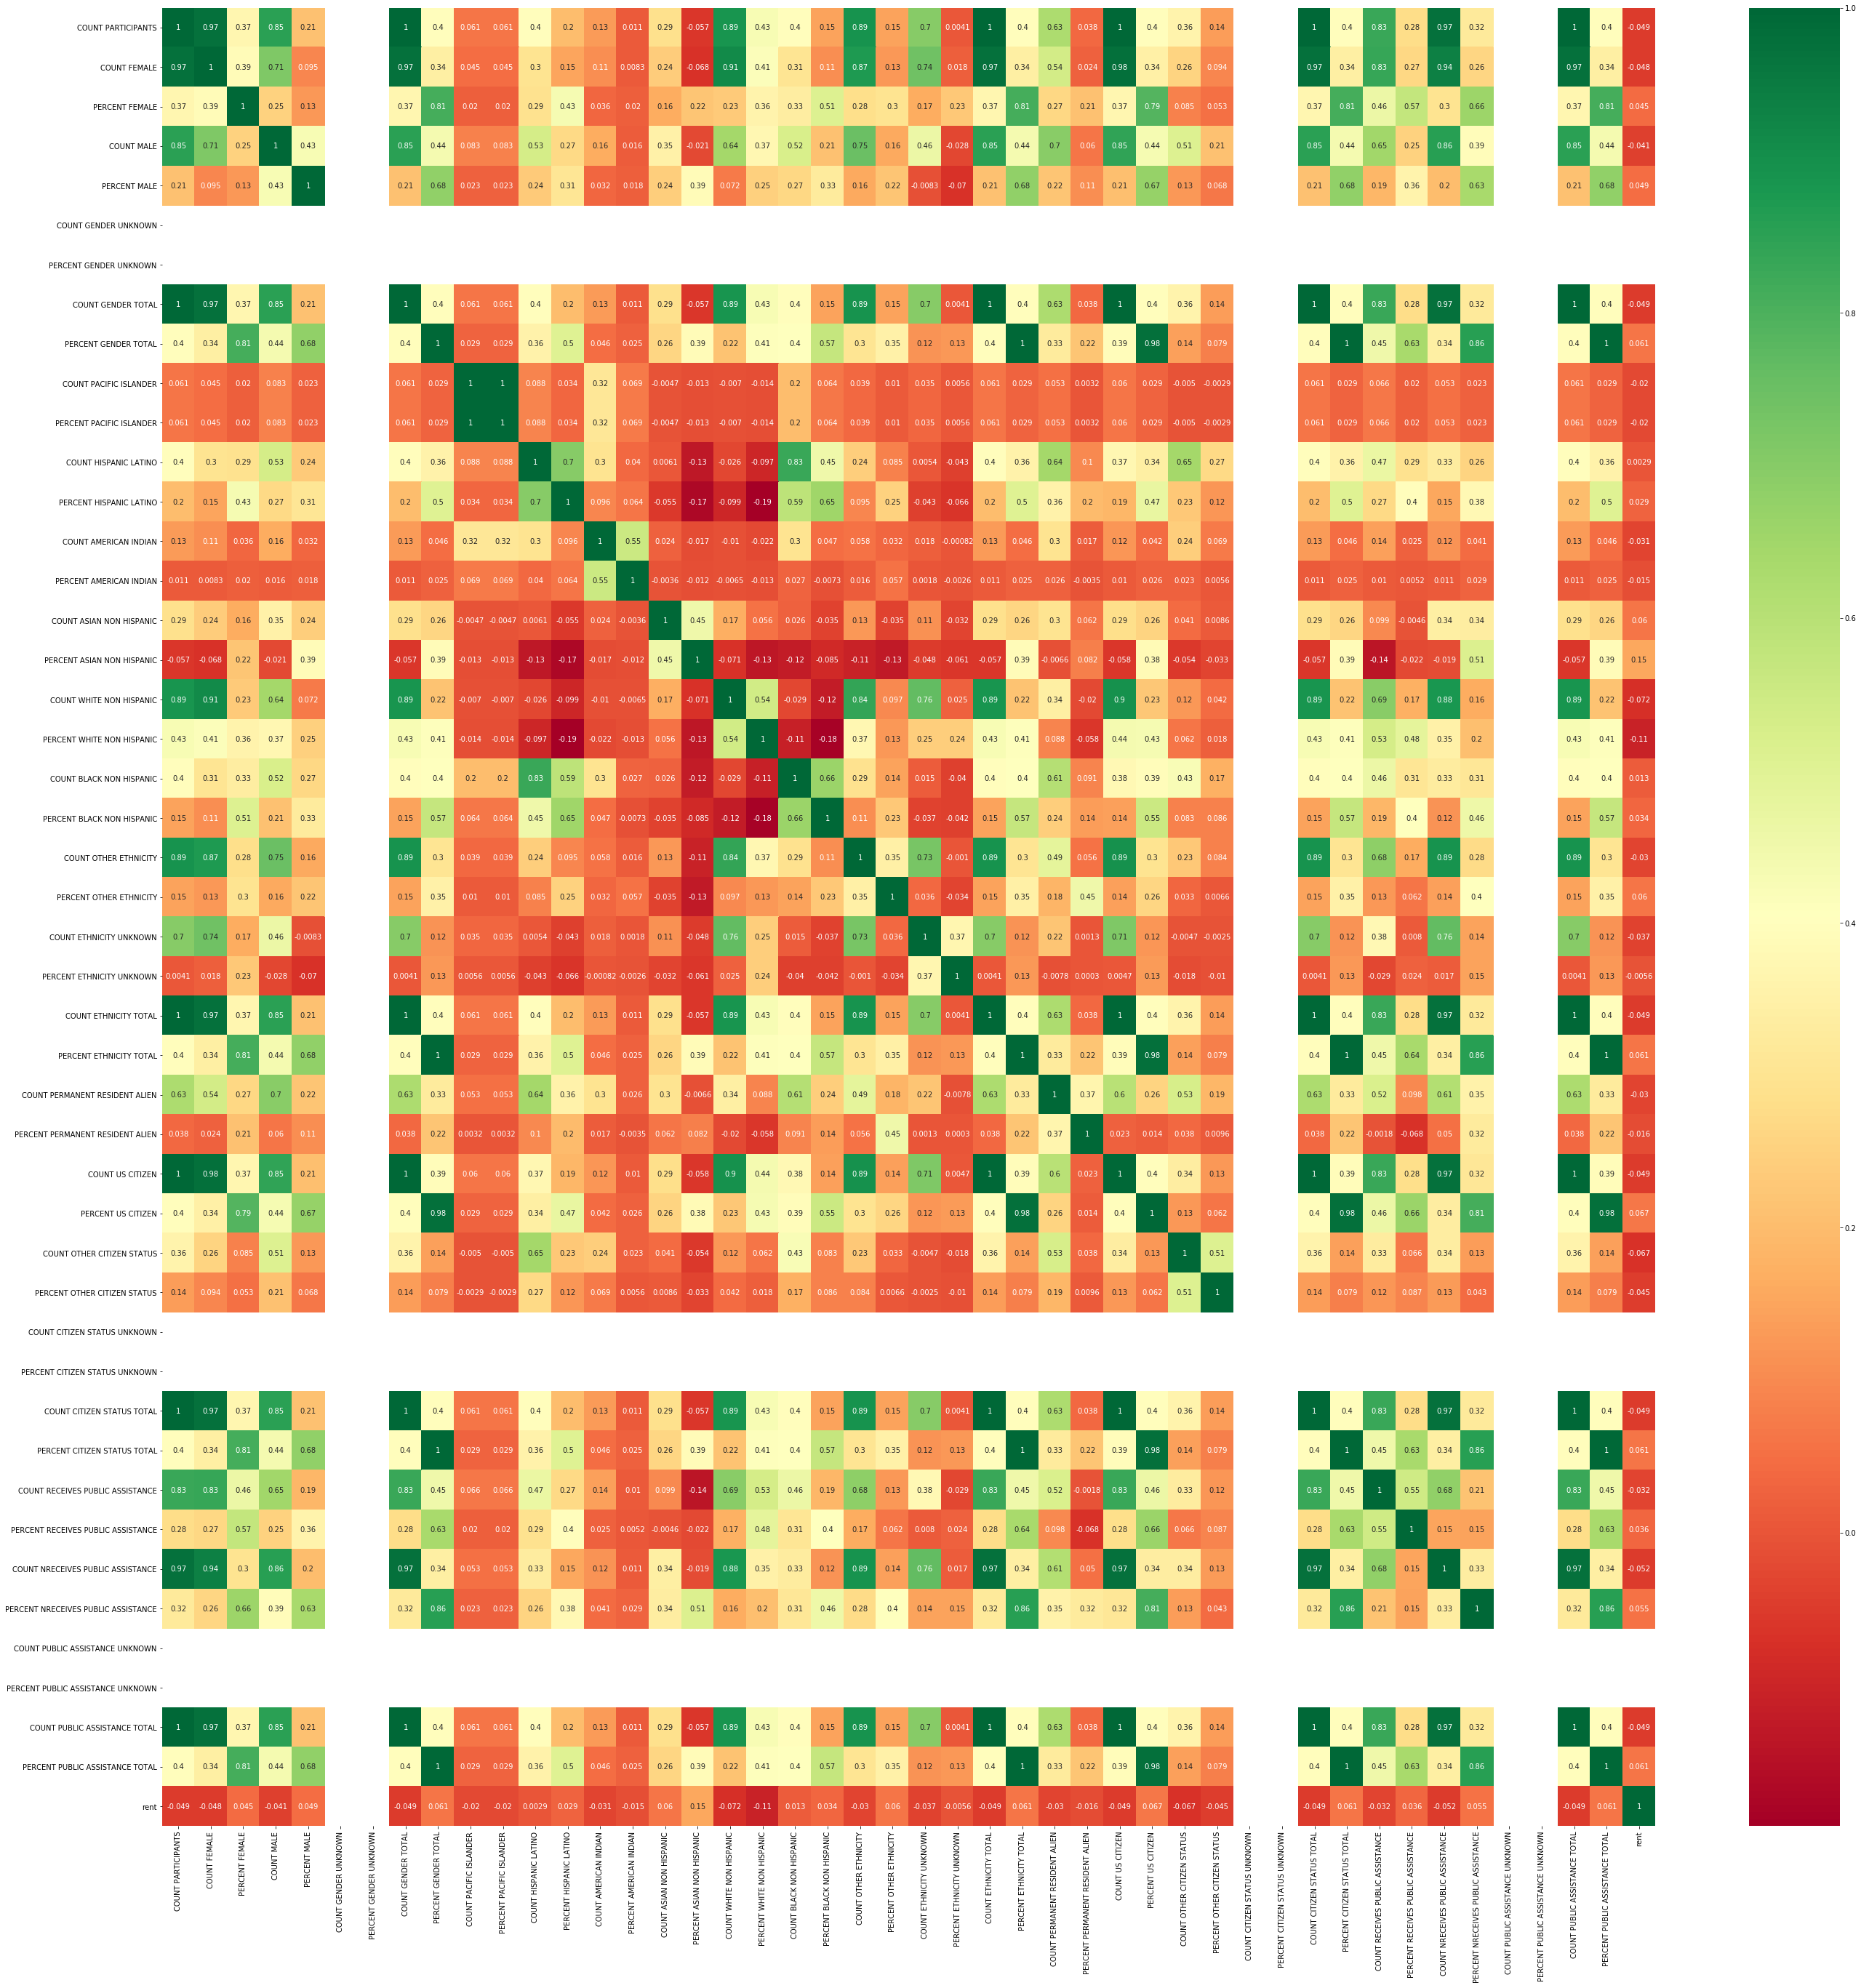

In [71]:
import numpy

#using a heatmap to select meaningful features
#columns = test1_df[:,0:29]
#target = test1_df.rent
# get_heatmap(test1_df)


columns_needed = demographic_by_zipcode_df.columns
columns_needed = numpy.append (columns_needed, ['rent'])

print(columns_needed)
test_heatmap_df = test_merge_df.filter(columns_needed, axis=1)

get_heatmap(test_heatmap_df)

In [66]:
sns.pairplot(test_merge_df, size=2.5)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001CDBC3F20D0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CDBC48C268> (for post_execute):


KeyboardInterrupt: 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linear_reg_model(X_train, y_train, X_test, y_test):
    """Trains and test linear regression model and returns mean_squared_error of
    y_test and y_predicted. 
    ----------
    X_train : data frame, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_train : data frame, shape = [n_samples]
        n_sample target values.
        
    X_test : data frame, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_test : data frame, shape = [n_samples]
        n_sample target values.
        
    Return 
        (data frame) y_prediction: predictions made from X_test
        (float) mean_squared_error of (y_test and y_prediction)
        (LinearRegression) returns the linear regression model.
    """

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_prediction = lr.predict(X_test)
    
    return lr ,y_prediction, mean_squared_error(y_test, y_prediction)

In [0]:
columns_needed = ['bathrooms', 'size_sqft', 'bin','bbl','has_doorman','floor_count','has_gym','rent']
features = ['bathrooms', 'size_sqft','bin','bbl','has_doorman','floor_count','has_gym']

linear_reg_train_df = train_df[columns_needed]

# Dataset contains one null value in bin. So I decided to drop it.
linear_reg_train_df = linear_reg_train_df.dropna(axis=0)

# Getting the features for training.
train_dropped_na = linear_reg_train_df[features]
# Getting the target columns
train_dropped_na_target = linear_reg_train_df[['rent']]

# Extracting the columns needed for testing. Useing test1.csv file.
test1_lr_df = test1_df[features]
# Getting the target columns to get accuracy of predictions. 
test1_lr_target = test1_df[['rent']]

lr, y_prediction, mse = train_linear_reg_model(train_dropped_na, train_dropped_na_target, test1_lr_df, test1_lr_target)
print("Mean square error of test1: " + str(mse))

In [54]:
test2_lr_df = test2_df[features]
test2_rent_predictions = lr.predict(test2_lr_df)
test2_rent_predictions = pd.DataFrame(test2_rent_predictions, index=test2_lr_df.index, columns=['rent'])
test2_rent_predictions
# send to a csv file
test2_rent_predictions.to_csv('rent_predictions.csv')


In [46]:
demographic_by_zipcode_df = pd.read_csv('Demographic_Statistics_By_Zip_Code.csv', index_col=0)
print(demographic_by_zipcode_df.columns)
merged_df = pd.merge(test1_df,demographic_by_zipcode_df, left_on = test1_df.addr_zip , right_index=True, how = 'left')

Index(['COUNT PARTICIPANTS', 'COUNT FEMALE', 'PERCENT FEMALE', 'COUNT MALE',
       'PERCENT MALE', 'COUNT GENDER UNKNOWN', 'PERCENT GENDER UNKNOWN',
       'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL', 'COUNT PACIFIC ISLANDER',
       'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
       'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN',
       'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC',
       'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
       'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC',
       'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY',
       'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN',
       'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL',
       'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
rental_id,,,,,,,,,,,,,,,,,,,,,
7499437,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,40.719799,...,8.0,100.0,1.0,0.13,7.0,0.88,0.0,0.0,8.0,100.0
7477903,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,40.693118,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
7481023,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,40.683399,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
7479547,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,40.799900,...,27.0,100.0,8.0,0.30,19.0,0.70,0.0,0.0,27.0,100.0
7518814,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,40.795350,...,20.0,100.0,8.0,0.40,12.0,0.60,0.0,0.0,20.0,100.0
7524679,#APT3F,13438,2,1.0,900.0,2018-08-31 12:15:50,98 RIVINGTON STREET,New York,10002,40.720258,...,35.0,100.0,2.0,0.06,33.0,0.94,0.0,0.0,35.0,100.0
7441537,NaN,18748615,0,0.0,1914.0,2018-08-03 16:59:16,2308 WEST 7 STREET,Brooklyn,11223,40.591537,...,109.0,100.0,20.0,0.18,89.0,0.82,0.0,0.0,109.0,100.0
7523245,#33C,54802,0,1.0,476.0,2018-08-30 18:05:40,520 WEST 43 STREET,New York,10036,40.760601,...,2.0,100.0,2.0,1.00,0.0,0.00,0.0,0.0,2.0,100.0
7516717,#18,560236,2,1.0,0.0,2018-08-28 14:17:34,1051 OCEAN AVENUE,Brooklyn,11226,40.636826,...,10.0,100.0,4.0,0.40,6.0,0.60,0.0,0.0,10.0,100.0
